<a href="https://colab.research.google.com/github/ricardopeloi/o_mais_novo_day_trader_do_brasil/blob/main/O_mais_novo_Day_Trader_do_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CONFIG] Instalações e pacotes

## Básicos (numpy, pandas, math, display, locale, time, random, re)

In [93]:
# !python -m pip install jupyter
!python -m pip install ipykernel

# !python -m pip install IPython
from IPython.display import display

import math

# !python -m pip install numpy
import numpy as np

import locale
# locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")  # Use "" for auto, or force e.g. to "en_US.UTF-8"

import time
from datetime import datetime, timedelta, date
from pandas.tseries.offsets import BDay # para os dias úteis

# # !python -m pip install random
import random
random.seed(42)

## Leitura e análise de dados (Excel, Pandas, Spark)

In [2]:
# !python -m pip install findspark

# !python -m pip install openpyxl
# !python -m pip install xlsxwriter
# !python -m pip install xlrd
# import openpyxl
# import xlsxwriter

# !python -m pip install pandas
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Visualização (matplotlib, seaborn, plotly)

In [3]:
# !python -m pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

# !python -m pip install seaborn
import seaborn as sns

# !python -m pip install plotly
import plotly.graph_objects as go
# import plotly.express as px
from plotly.subplots import make_subplots

## Séries temporais (statsmodels, Prophet)

In [4]:
!python -m pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

!python -m pip install prophet
from prophet import Prophet

## Finanças (yfinance, mplfinance)

In [5]:
# https://pypi.org/project/yfinance/
# https://github.com/ranaroussi/yfinance/wiki/Ticker

!python -m pip install yfinance
import yfinance as yf

!python -m pip install mplfinance
import mplfinance as mpf

# # Em R
# # https://cran.r-project.org/web/packages/BatchGetSymbols/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 956.7 kB/s eta 0:00:00


## Leitura de dados em sites e APIs (Beautiful Soup e requests)

In [6]:
# !python -m pip install BeautifulSoup
from bs4 import BeautifulSoup

# !python -m pip install requests
import requests

## Regresão (sklearn)

In [7]:
!python -m pip install scikit-learn

from sklearn.linear_model import LinearRegression

## Drive (para ler e escrever arquivos)

In [8]:
try:
    # PARA A LEITURA DOS DADOS EM PLANILHA DE SHEETS
    # https://stackoverflow.com/questions/71686960/typeerror-credentials-need-to-be-from-either-oauth2client-or-from-google-auth
    from google.colab import drive
    from google.colab import auth
    # !pip install gspread
    import gspread
    from google.auth import default
    creds, _ = default()

    auth.authenticate_user()
    gc = gspread.authorize(creds)
    drive.mount('/content/drive')

    esta_no_colab = True

except:
    print("Você não está no Colab!")

    esta_no_colab = False

Mounted at /content/drive


# Funções

## Regressão linear com pontos de uma ação

'Média: 38.6720'

'Desvio padrão: 2.1281'

'Desvio padrão (%): 0.0550'

'Inclinação da reta (alfa, coeficiente angular): 0.0271'

'Valor de fechamento (R$): 36.63'

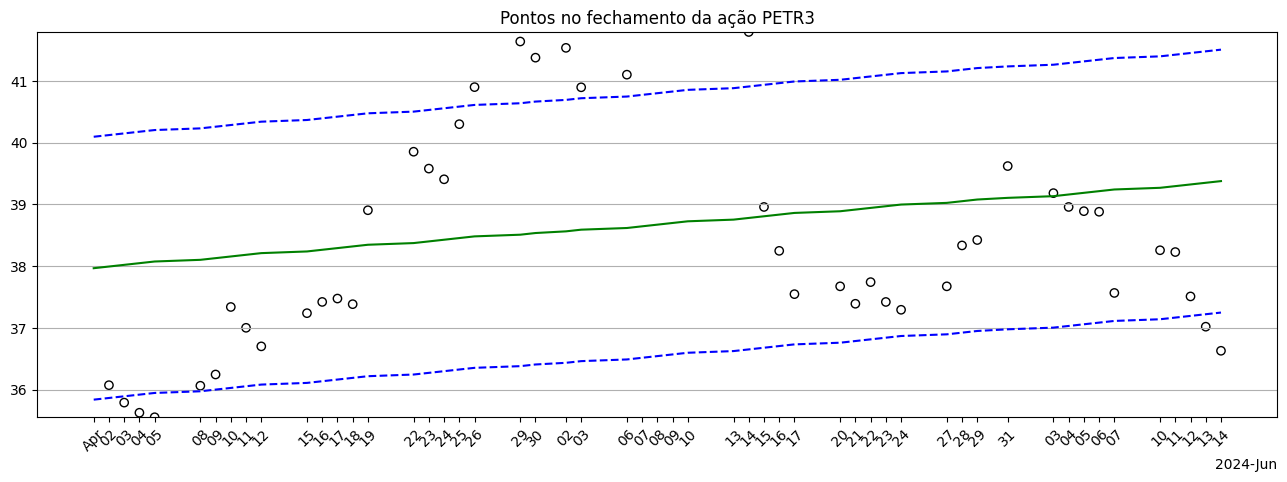

In [144]:
def criar_regressao_bd_acao(
  bd_acao,
  coluna = "Close",
  print_variaveis = False,
  plot_grafico = False,
  tamanho_figsize = (10,5),
  rotacao = 45,
  titulo = "Pontos no fechamento da ação",
  var_pular_final_de_semana_feriados = False,
):
  # bd_acao

  bd_acao_coluna = bd_acao.reset_index()[[bd_acao.index.name, coluna]]
  # bd_acao_coluna

  # from sklearn.linear_model import LinearRegression

  X = bd_acao_coluna.reset_index()["index"].array.reshape(-1, 1)
  y = bd_acao_coluna.loc[:, coluna].array.reshape(-1, 1)

  modelo_linear = LinearRegression()
  modelo_linear.fit(X, y)

  bd_acao_coluna.loc[:, "Regressão"] = modelo_linear.predict(X)
  # bd_acao_fim

  desvio_padrao = bd_acao_coluna[coluna].std()
  media = bd_acao_coluna[coluna].mean()
  alfa = modelo_linear.coef_[0][0]
  valor_fechamento = bd_acao_coluna.sort_index(ascending = False).iloc[0][coluna]

  # margem = 0.005
  margem = desvio_padrao/media

  if print_variaveis == True:
    display("Média: " + "{:.4f}".format(media))
    display("Desvio padrão: " + "{:.4f}".format(desvio_padrao))
    display("Desvio padrão (%): " + "{:.4f}".format(margem))
    display("Inclinação da reta (alfa, coeficiente angular): " + "{:.4f}".format(alfa))
    display("Valor de fechamento (R$): " + "{:.2f}".format(valor_fechamento))


  if plot_grafico == True:
    plt.figure(figsize = tamanho_figsize)

    ax = plt.gca()

    if var_pular_final_de_semana_feriados == True:
      ax.xaxis.set_major_locator(ticker.LinearLocator(len(bd_acao_coluna)))
      # ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
      # ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt = "%d/%m/%y"))

      plt.xticks(rotation = rotacao)

      plt.scatter(x = bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), y = coluna, data = bd_acao_coluna, edgecolors='black', facecolors='none')

      plt.plot(bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), bd_acao_coluna["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
      plt.plot(bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), bd_acao_coluna["Regressão"], color='green')
      plt.plot(bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), bd_acao_coluna["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')

      # ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt = "%d/%m/%y"))
      # ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    else:
      ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

      plt.xticks(bd_acao_coluna[bd_acao.index.name], rotation = rotacao)

      plt.scatter(x = bd_acao_coluna[bd_acao.index.name], y = coluna, data = bd_acao_coluna, edgecolors='black', facecolors='none')

      plt.plot(bd_acao_coluna[bd_acao.index.name], bd_acao_coluna["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
      plt.plot(bd_acao_coluna[bd_acao.index.name], bd_acao_coluna["Regressão"], color='green')
      plt.plot(bd_acao_coluna[bd_acao.index.name], bd_acao_coluna["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')

    plt.grid(axis = "y")
    plt.title(titulo)
    plt.show()

  return [bd_acao_coluna, media, desvio_padrao, modelo_linear, valor_fechamento]


criar_regressao_bd_acao(
  yf.Ticker("PETR3"+ ".SA").history(
    start = datetime.today() - BDay(55),
    end = datetime.today(),
    interval = "1d"
  ),
  coluna = "Close",
  print_variaveis = True,
  plot_grafico = True,
  tamanho_figsize = (16,5),
  rotacao = 45,
  titulo = "Pontos no fechamento da ação " + "PETR3",
  var_pular_final_de_semana_feriados = False,
);

## Candle plot no Plotly (análise de ações)

In [10]:
def candle_plot(
    dados,
    volume = True,
    mav = np.nan,
    colors = ["orange", "yellow", "blue"],
    titulo = "",
    ):

  if volume == True:
    fig = make_subplots(
        rows = 2,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.1,
        subplot_titles = ("Candlesticks", "Volume transacionado"),
        row_width = [0.2, 0.7]
    )
  else:
    fig = make_subplots(
        rows = 1,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.1,
        subplot_titles = ("Candlesticks"),
        row_width = [0.2, 0.7]
    )

  fig.add_trace(go.Candlestick(x=dados.index,
                      open = dados['Open'],
                      high = dados['High'],
                      low = dados['Low'],
                      close = dados['Close']),
                row = 1, col = 1)

  if mav is not np.nan:
    for i in range(len(mav)):
      # print(i)
      dados["Close "+ str(mav[i]) +" períodos"] = dados["Close"].rolling(window=mav[i]).mean()
      fig.add_trace(go.Scatter(x=dados.index,
                          y = dados["Close "+ str(mav[i]) +" períodos"],
                          mode = "lines",
                          name = "Média móvel fechamento " + str(mav[i]) + " períodos",
                          marker=dict(color=colors[i])),
                    row = 1, col = 1)

  if volume == True:
    fig.add_trace(go.Bar(x=dados.head(60).index,
                        y = dados['Volume'],
                        name = "Volume"),
                  row = 2, col = 1)


  fig.update_layout(
      yaxis_title = "Preço",
      xaxis_rangeslider_visible=False,
      title=titulo,
      )

  fig.show()

# candle_plot(
#     dados = dados_candle_matp_media_movel.head(60),
#     volume = True,
#     mav = [7,14],
#     # colors = ["orange", "yellow", "blue"],
#     titulo = "PETR4.SA",
#     )

## Exportar para o Excel, já com uma tabelinha pronta para fazer Pivot Tables (_exporta_excel_com_tabela_)

In [115]:
def exporta_excel_com_tabela(
        bd,
        caminho_nome_arquivo
        ):
    # https://stackoverflow.com/questions/58326392/how-to-create-excel-table-with-pandas-to-excel
    # import pandas as pd

    # Create a Pandas dataframe from some data.
    # data = [10, 20, 30, 40, 50, 60, 70, 80]
    # df = pd.DataFrame({'Rank': data,
                    # 'Country': data,
                    # 'Population': data,
                    # 'Data1': data,
                    # 'Data2': data})

    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter(caminho_nome_arquivo, engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object. Turn off the default
    # header and index and skip one row to allow us to insert a user defined
    # header.
    bd.to_excel(writer, sheet_name='Sheet1', startrow=1, header=False, index=False)

    # Get the xlsxwriter workbook and worksheet objects.
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']

    # Get the dimensions of the dataframe.
    (max_row, max_col) = bd.shape

    # Create a list of column headers, to use in add_table().
    column_settings = []
    for header in bd.columns:
        column_settings.append({'header': header})

    # Add the table.
    worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})

    # Make the columns wider for clarity.
    worksheet.set_column(0, max_col - 1, 12)

    # Close the Pandas Excel writer and output the Excel file.
    writer.close()


# exporta_excel_com_tabela(
        # bd = dados_consolidado,
        # caminho_nome_arquivo = caminho + "Custo e Volume de Produção.xlsx"
        # )

# Variáveis globais

## Caminho da pasta

In [11]:
if esta_no_colab == True:
    caminho_da_pasta = '/content/drive/My Drive/Trabalho/Investimentos/'

else:
    caminho_da_pasta = "G:/My Drive/Trabalho/Investimentos/"

display(caminho_da_pasta)

'/content/drive/My Drive/Trabalho/Investimentos/'

## Ler e escrever na pasta

In [12]:
# ler_dados_da_pasta = True
ler_dados_da_pasta = False

if ler_dados_da_pasta == True:
  if esta_no_colab == True:
    gc = gspread.authorize(creds)
    drive.mount('/content/drive')

# Leitura

## Lista completa de ações da B3

In [113]:
data_hoje = datetime.now().strftime("%d/%m/%Y")

In [114]:
if ler_dados_da_pasta == False:
  url = "https://www.dadosdemercado.com.br/bolsa/acoes"
  response = requests.get(url)

  # Create a BeautifulSoup object with the HTML content
  soup = BeautifulSoup(response.content, 'html.parser')
  # soup


  soup_tabela_acoes = soup.find('div', class_='table-container').find_all("tr")
  lista_acoes = []
  # data_de_hoje = "Volume em " + data_hoje
  data_de_hoje = "Volume no último dia útil" # (lido em " + data_hoje + ")"

  for soup_acao in soup_tabela_acoes:
    # print("")
    try:
      lista_acoes.append({
          "Nome da Empresa": soup_acao.find_all("td")[1].text.strip(),
          "Ticker": soup_acao.find("a").text.strip(),
          data_de_hoje: soup_acao.find_all("td")[2].text.strip(),
          "Data da leitura": data_hoje,
      })
    except:
      pass

  bd_lista_acoes = pd.DataFrame(lista_acoes)
  try:
    bd_lista_acoes[data_de_hoje] = bd_lista_acoes[data_de_hoje].str.replace(".", "", regex = True).astype(int)
  except:
    bd_lista_acoes[data_de_hoje] = bd_lista_acoes[data_de_hoje].str.replace(".", "", regex = False).astype(int)

  bd_lista_acoes = bd_lista_acoes.set_index(["Data da leitura", "Ticker"])
  bd_lista_acoes.to_excel(caminho_da_pasta + 'Bases/Lista de ações.xlsx')

elif ler_dados_da_pasta == True:
  bd_lista_acoes = pd.read_excel(
    caminho_da_pasta + 'Bases/Lista de ações.xlsx',
    # encoding = 'ISO-8859-1',
    # low_memory=False,
    index_col = 0
  )

# len(bd_lista_acoes["Ticker"].unique())
# bd_lista_acoes.groupby(["Ticker"]).count().sort_values("Nome da Empresa", ascending = False)
# bd_lista_acoes[(bd_lista_acoes["Ticker"] == "IGTI4") + (bd_lista_acoes["Ticker"] == "IGTI3")]

# bd_lista_acoes = bd_lista_acoes[bd_lista_acoes["Nome da Empresa"] != "Jereissati Participações"]

bd_lista_acoes
bd_lista_acoes#.info()

Nome da Empresa  \
Data da leitura Ticker                                   
15/06/2024      PETR4                        Petrobras   
                CIEL3                            Cielo   
                BBDC4                   Banco Bradesco   
                HAPV3                          Hapvida   
                COGN3                            Cogna   
...                                                ...   
                CSRN6                           COSERN   
                PEAB4   Participações Aliança da Bahia   
                CEEB5                           COELBA   
                PATI3                     Panatlântica   
                CEED3                           CEEE D   

                        Volume no último dia útil  
Data da leitura Ticker                             
15/06/2024      PETR4                    53519200  
                CIEL3                    48353400  
                BBDC4                    43737800  
                HAPV3                    41965700  
                COGN3                    36990000  
...                                           ...  
                CSRN6                         100  
                PEAB4                         300  
                CEEB5                         400  
                PATI3                         200  
                CEED3                         200  

[397 rows x 2 columns]

## Montando base completa

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GOLL11.SA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GOLL11.SA&crumb=EtPgsoRzukx


Nome da Empresa  Volume no último dia útil  \
Data da leitura Ticker                                                    
15/06/2024      PETR4              Petrobras                   53519200   
                CIEL3                  Cielo                   48353400   
                BBDC4         Banco Bradesco                   43737800   
                HAPV3                Hapvida                   41965700   
                COGN3                  Cogna                   36990000   
...                                      ...                        ...   
                PMAM3           Paranapanema                      24700   
                DEXP3                 Dexxos                      22600   
                EPAR3   Embpar Participações                      22400   
                INEP4                 Inepar                      22200   
                JFEN3            João Fortes                      21000   

                               Market Cap  
Data da leitura Ticker                     
15/06/2024      PETR4  461,743,390,720.00  
                CIEL3   15,242,775,552.00  
                BBDC4  128,398,794,752.00  
                HAPV3   28,103,962,624.00  
                COGN3    3,132,352,256.00  
...                                   ...  
                PMAM3      139,571,056.00  
                DEXP3    1,092,557,824.00  
                EPAR3       87,826,144.00  
                INEP4       80,626,920.00  
                JFEN3      271,011,392.00  

[251 rows x 3 columns]

<Axes: >

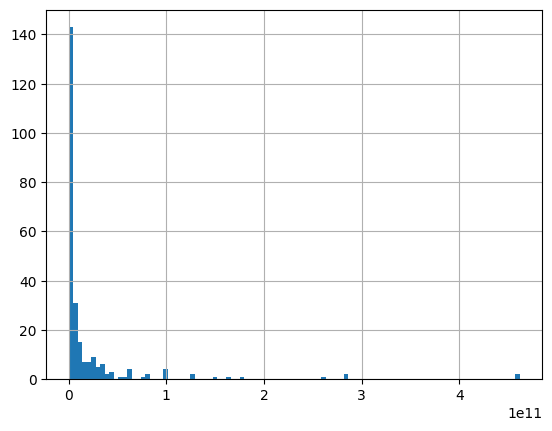

In [118]:
var_corte_market_cap = 50000000
var_corte_volume = 20000
var_coluna_volume = [col for col in bd_lista_acoes.columns if "Volume" in col]

if ler_dados_da_pasta == False:
  bd_lista_acoes = bd_lista_acoes.reset_index().set_index("Ticker")

  for ticker_acao in bd_lista_acoes.index:
    acao = yf.Ticker(ticker_acao + ".SA")
    try:
      bd_lista_acoes.loc[ticker_acao, "Market Cap"] = acao.info["marketCap"]
    except:
      pass

    # try:
    #   bd_lista_acoes.loc[ticker_acao, "Quote Type"] = acao.info["quoteType"]
    # except:
    #   pass

    # display(acao)

  # display(bd_lista_acoes)

  # bd_lista_acoes.groupby("Quote Type").count()
  # bd_lista_acoes["Market Cap"].hist(bins = 100)


  bd_lista_acoes_tratada = bd_lista_acoes[
      (bd_lista_acoes["Market Cap"] >= var_corte_market_cap)
      * (bd_lista_acoes[var_coluna_volume].iloc[:, 0] >= var_corte_volume)
      # * (~bd_lista_acoes["Quote Type"].isna()) \
      ]


  bd_lista_acoes_tratada.to_excel(caminho_da_pasta + 'Bases/Lista de ações Tratada.xlsx')


elif ler_dados_da_pasta == True:
  bd_lista_acoes_tratada = pd.read_excel(
    caminho_da_pasta + 'Bases/Lista de ações Tratada.xlsx',
    # encoding = 'ISO-8859-1',
    # low_memory=False,
    index_col = 0
  )

bd_lista_acoes_tratada = bd_lista_acoes_tratada.reset_index().set_index(["Data da leitura", "Ticker"])

bd_lista_acoes_tratada.sort_values([col for col in bd_lista_acoes_tratada.columns if "Volume" in col], ascending = False)
display(bd_lista_acoes_tratada)
bd_lista_acoes_tratada["Market Cap"].hist(bins = 100)

# Exemplo gráfico intradiário _yfinance_ (comentado)

In [45]:
# bd_lista_acoes.index[0]

In [46]:
# # acao = "PETR4.SA"
# # acao = "BOBR4.SA"
# acao = bd_lista_acoes_tratada.index[0] + ".SA"


# bd_acao = yf.Ticker(acao).history(
#     period = "1d",
#     interval = "15m"
# )
# bd_acao.index = bd_acao.index.tz_localize(None)

# bd_acao

In [47]:
# bd_acao.reset_index().info()

## Média do início e fim do período

In [48]:
# bd_acao["Média"] = (bd_acao["Close"] + bd_acao["Open"])/2
# bd_acao

In [49]:
# bd_acao_media = bd_acao.reset_index()[["Datetime", "Média"]]

# bd_acao_media

### Visualização da média

In [50]:
# plt.scatter(x = "Datetime", y = "Média", data = bd_acao_media)

### Regressão linear

In [51]:
# # from sklearn.linear_model import LinearRegression


# X = bd_acao_media.reset_index()["index"].array.reshape(-1, 1)
# y = bd_acao_media.loc[:, "Média"].array.reshape(-1, 1)

# modelo_linear = LinearRegression()
# modelo_linear.fit(X, y)

# bd_acao_media["Regressão"] = modelo_linear.predict(X)

# bd_acao_media

In [52]:
# plt.figure(figsize = (10,5))

# plt.scatter(x = "Datetime", y = "Média", data = bd_acao_media, edgecolors='black', facecolors='none')

# # margem = 0.005
# # margem = bd_acao_media["Média"].std()
# media = bd_acao_media["Média"].mean()
# desvio_padrao = bd_acao_media["Média"].std()
# alfa = modelo_linear.coef_[0][0]

# display("Média: " + "{:.4f}".format(media))
# display("Desvio padrão: " + "{:.4f}".format(desvio_padrao))
# display("Desvio padrão (%): " + "{:.4f}".format(desvio_padrao/media))
# display("Inclinação da reta (alfa, coeficiente angular): " + "{:.4f}".format(alfa))

# plt.plot(bd_acao_media["Datetime"], bd_acao_media["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
# plt.plot(bd_acao_media["Datetime"], bd_acao_media["Regressão"], color='green')
# plt.plot(bd_acao_media["Datetime"], bd_acao_media["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')

# ax = plt.gca()
# plt.xticks(bd_acao_media["Datetime"], rotation = 45)
# ax.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# plt.title(acao + " (média início e fim do período)")
# plt.show()

## Apenas fim

In [53]:
# # bd_acao

# bd_acao_fim = bd_acao.reset_index()[["Datetime", "Close"]]
# # bd_acao_fim

# # from sklearn.linear_model import LinearRegression

# X = bd_acao_fim.reset_index()["index"].array.reshape(-1, 1)
# y = bd_acao_fim.loc[:, "Close"].array.reshape(-1, 1)

# modelo_linear = LinearRegression()
# modelo_linear.fit(X, y)

# bd_acao_fim["Regressão"] = modelo_linear.predict(X)

# bd_acao_fim

In [54]:
# plt.figure(figsize = (10,5))

# plt.scatter(x = "Datetime", y = "Close", data = bd_acao_fim, edgecolors='black', facecolors='none')

# # margem = 0.005
# desvio_padrao = bd_acao_fim["Close"].std()
# media = bd_acao_fim["Close"].mean()
# alfa = modelo_linear.coef_[0][0]

# display("Média: " + "{:.4f}".format(media))
# display("Desvio padrão: " + "{:.4f}".format(desvio_padrao))
# display("Desvio padrão (%): " + "{:.4f}".format(desvio_padrao/media))
# display("Inclinação da reta (alfa, coeficiente angular): " + "{:.4f}".format(alfa))

# plt.plot(bd_acao_fim["Datetime"], bd_acao_fim["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
# plt.plot(bd_acao_fim["Datetime"], bd_acao_fim["Regressão"], color='green')
# plt.plot(bd_acao_fim["Datetime"], bd_acao_fim["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')

# ax = plt.gca()
# plt.xticks(bd_acao_fim["Datetime"], rotation = 45)
# ax.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# plt.title(acao + " (fechamento)")
# plt.show()

## Função completa

In [55]:
# acao = bd_lista_acoes_tratada.index[0] + ".SA"
# bd_acao = yf.Ticker(acao).history(
#     period = "1d",
#     interval = "15m"
# )
# bd_acao.index = bd_acao.index.tz_localize(None)

# criar_regressao_bd_acao(
#   bd_acao,
#   coluna = "Close",
#   print_variaveis = True,
#   plot_grafico = True,
#   titulo = acao + " (fechamento)"
# );

# Detecção de martelo

## Exemplo (comentado)

In [56]:
# # acao = bd_lista_acoes_tratada.index[0] + ".SA"
# acao = "PETR3" + ".SA"
# print(acao )
# bd_acao = yf.Ticker(acao).history(
#     period = "21d",
#     interval = "1d"
# )
# bd_acao["Amplitude Open-Close"] = abs(bd_acao["Open"] - bd_acao["Close"])
# bd_acao["Amplitude High-Low"] = abs(bd_acao["High"] - bd_acao["Low"])

# taxa_máxima_para_ser_martelo = 0.2
# bd_acao["Martelo?"] = (bd_acao["Amplitude Open-Close"] < taxa_máxima_para_ser_martelo * bd_acao["Amplitude High-Low"])


# [bd_acao_coluna, media, desvio_padrao, modelo_linear, valor_fechamento] = criar_regressao_bd_acao(
#   bd_acao,
#   coluna = "Close",
#   print_variaveis = True,
#   plot_grafico = True,
#   titulo = acao + " (fechamento)"
# );

# display(bd_acao[bd_acao["Martelo?"] == True])

# # df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# fig = go.Figure(data=[go.Candlestick(x=bd_acao.index,
#                 open = bd_acao['Open'],
#                 high = bd_acao['High'],
#                 low = bd_acao['Low'],
#                 close = bd_acao['Close'])])
# fig.update_layout(
#     # xaxis_rangeslider_visible=False,
#     title=acao,
#     )
# fig.show()

In [57]:
# lista_datas_martelo = bd_acao[bd_acao["Martelo?"] == True].sort_index(ascending = False).index.to_pydatetime()
# string_datas_martelo = ""
# for data in lista_datas_martelo:
#   string_datas_martelo = data.strftime("%d/%m/%y") + ", " + string_datas_martelo

# string_datas_martelo[:-2]

## Função completa (plota candlestick acha martelos de 1 ação)

In [102]:
def plota_candlestick_acha_martelos(
    acao,
    periodo = 55,
    intervalo = "1d",
    taxa_máxima_para_ser_martelo = 0.2,
    display_tabela_martelo = True,
    display_candlestick = True,

  ):

  bd_acao = yf.Ticker(acao).history(
      start = datetime.today() - BDay(periodo),
      end = datetime.today(),
      interval = intervalo
  )
  # bd_acao = yf.Ticker(acao).history(
      # period = periodo,
      # interval = intervalo
  # )
  bd_acao["Amplitude Open-Close"] = abs(bd_acao["Open"] - bd_acao["Close"])
  bd_acao["Amplitude High-Low"] = abs(bd_acao["High"] - bd_acao["Low"])

  # taxa_máxima_para_ser_martelo = 0.2
  bd_acao["Martelo?"] = (bd_acao["Amplitude Open-Close"] < taxa_máxima_para_ser_martelo * bd_acao["Amplitude High-Low"])

  # lista_datas_martelo = bd_acao[bd_acao["Martelo?"] == True].sort_index(ascending = False).index.to_pydatetime()
  lista_datas_martelo = pd.to_datetime(bd_acao[bd_acao["Martelo?"] == True].sort_index(ascending = False).index)
  string_datas_martelo = ""
  for data in lista_datas_martelo:
    string_datas_martelo = data.strftime("%d/%m/%y") + ", " + string_datas_martelo

  # string_datas_martelo[:-2]


  if display_tabela_martelo == True:
    display(bd_acao[bd_acao["Martelo?"] == True])

  if display_candlestick == True:
    candle_plot(
    bd_acao,
    volume = True,
    # mav = np.nan,
    # colors = ["orange", "yellow", "blue"],
    titulo = acao,
    )

  return [bd_acao, string_datas_martelo]

[_, string_datas_martelo] = plota_candlestick_acha_martelos(
    acao =  "PETR3" + ".SA",
    # periodo = "3mo", #['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
    periodo = 55,
    intervalo = "1d",
    taxa_máxima_para_ser_martelo = 0.2,
    display_tabela_martelo = True,
    display_candlestick = True,
  );

display(string_datas_martelo)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Amplitude Open-Close,Amplitude High-Low,Martelo?
Date,,,,,,,,,,
2024-04-04 00:00:00-03:00,35.81,37.18,35.24,35.63,35243500,0.00,0.00,0.18,1.94,True
2024-04-05 00:00:00-03:00,35.54,35.97,34.73,35.55,14912300,0.00,0.00,0.02,1.24,True
2024-04-09 00:00:00-03:00,36.36,36.42,35.66,36.25,9100900,0.00,0.00,0.12,0.76,True
2024-04-17 00:00:00-03:00,37.51,37.77,37.34,37.48,10628800,0.00,0.00,0.04,0.43,True
2024-04-23 00:00:00-03:00,39.66,39.92,39.29,39.58,14932800,0.00,0.00,0.08,0.63,True
2024-04-30 00:00:00-03:00,41.50,41.60,40.93,41.38,12677300,0.00,0.00,0.12,0.67,True
2024-05-02 00:00:00-03:00,41.58,41.76,41.14,41.53,12134000,0.00,0.00,0.05,0.62,True
2024-05-15 00:00:00-03:00,38.84,39.25,37.79,38.96,32787700,0.00,0.00,0.12,1.46,True
2024-06-04 00:00:00-03:00,38.87,39.06,38.24,38.96,11004300,0.00,0.00,0.09,0.82,True


'04/04/24, 05/04/24, 09/04/24, 17/04/24, 23/04/24, 30/04/24, 02/05/24, 15/05/24, 04/06/24, 06/06/24, '

# Detecta 2 inclinações (alfas) e martelos de cada ação no maior período

In [62]:
# qtd_dias = int(np.round(55/7*5))
# bd_acao = yf.Ticker(bd_lista_acoes_tratada.index[0] + ".SA").history(
#     # period = "30d",
#     start = datetime.today() - timedelta(days=qtd_dias),
#     end = datetime.today(),
#     interval = "1d"
# )
# bd_acao.index = bd_acao.index.tz_localize(None)
# # bd_acao.index.name

# [_, _, _, modelo_linear, _] = criar_regressao_bd_acao(
#   bd_acao,
#   coluna = "Close",
#   print_variaveis = True,
#   plot_grafico = True,
#   titulo = bd_lista_acoes_tratada.index[0] + " (fechamento dos últimos " + str(qtd_dias) + " períodos)",
#   tamanho_figsize = (15, 6),
#   # rotacao = 60,
#   # var_pular_final_de_semana_feriados = True,
# )

In [109]:
if ler_dados_da_pasta == False:

  bd_lista_acoes_analise = bd_lista_acoes_tratada.copy()

  coluna_analise = "HLC"

  qtd_dias_maximo = 55 #int(np.round(55/7*5))
  qtd_dias_minimo = 13 #int(np.round(21/7*5))

  for acao in bd_lista_acoes_tratada.index:#[[0]]:
  # for acao in ["AZEV3"]:
    # print(acao)

    bd_acao_maximo = yf.Ticker(acao + ".SA").history(
        start = datetime.today() - BDay(qtd_dias_maximo),
        end = datetime.today(),
        interval = "1d"
    )
    bd_acao_maximo.index = bd_acao_maximo.index.tz_localize(None)
    bd_acao_maximo[coluna_analise] = (bd_acao_maximo["High"] + bd_acao_maximo["Low"] + bd_acao_maximo["Close"])/3


    # PREÇO HLC NA DATA DA LEITURA (MÉDIA DE HIGH, LOW E CLOSE)
    bd_lista_acoes_analise.loc[acao, "Preço HLC na data da leitura"] = \
     (bd_acao_maximo.iloc[len(bd_acao_maximo)-1].loc["High"]  \
      + bd_acao_maximo.iloc[len(bd_acao_maximo)-1].loc["Low"]  \
      + bd_acao_maximo.iloc[len(bd_acao_maximo)-1].loc["Close"])/3


    # NO MENOR PERÍODO (55 DIAS ÚTEIS, EM GERAL): PREÇO HLC, PREÇO CLOSE E ALFA
    [_, _, _, modelo_linear, _] = criar_regressao_bd_acao(
      bd_acao_maximo,
      coluna = coluna_analise,
      print_variaveis = False,
      plot_grafico = False,
      # titulo = acao + " (fechamento dos últimos " + str(qtd_dias_maximo) + " períodos)",
      # tamanho_figsize = (15, 6),
      # rotacao = 60,
    )
    bd_lista_acoes_analise.loc[acao, "Alfa (" + str(qtd_dias_maximo) +" períodos)"] = modelo_linear.coef_[0][0]

    bd_lista_acoes_analise.loc[acao, "Preço Close há " + str(qtd_dias_maximo) +" períodos"] = bd_acao_maximo.iloc[0]["Close"]

    preco_hlc_maximo = (bd_acao_maximo.iloc[0].loc["High"] + bd_acao_maximo.iloc[0].loc["Low"] + bd_acao_maximo.iloc[0].loc["Close"])/3
    bd_lista_acoes_analise.loc[acao, "Preço HLC há "+ str(qtd_dias_maximo) +" períodos"] = preco_hlc_maximo
    bd_lista_acoes_analise.loc[acao, "Alfa/Preço HLC (" + str(qtd_dias_maximo) +" períodos)"] = modelo_linear.coef_[0][0] / preco_hlc_maximo


    # NO MENOR PERÍODO (13 DIAS ÚTEIS, EM GERAL): PREÇO HLC, PREÇO CLOSE E ALFA
    bd_acao_minimo = bd_acao_maximo.iloc[-(qtd_dias_minimo):].copy()

    [_, _, _, modelo_linear, _] = criar_regressao_bd_acao(
      bd_acao_minimo,
      coluna = coluna_analise,
      print_variaveis = False,
      plot_grafico = False,
      # titulo = acao + " (fechamento dos últimos " + str(qtd_dias_minimo) + " períodos)",
      # tamanho_figsize = (15, 6),
      # rotacao = 60,
    )
    bd_lista_acoes_analise.loc[acao, "Alfa (" + str(qtd_dias_minimo) +" períodos)"] = modelo_linear.coef_[0][0]

    bd_lista_acoes_analise.loc[acao, "Preço Close há " + str(qtd_dias_minimo) +" períodos"] = bd_acao_minimo.iloc[0]["Close"]

    preco_hlc_minimo = (bd_acao_minimo.iloc[0].loc["High"] + bd_acao_minimo.iloc[0].loc["Low"] + bd_acao_minimo.iloc[0].loc["Close"])/3
    bd_lista_acoes_analise.loc[acao, "Preço HLC há "+ str(qtd_dias_minimo) +" períodos"] = preco_hlc_minimo
    bd_lista_acoes_analise.loc[acao, "Alfa/Preço HLC (" + str(qtd_dias_minimo) +" períodos)"] = modelo_linear.coef_[0][0] / preco_hlc_minimo

    # bd_lista_acoes_analise


    # ACHA MARTELOS, SEM PLOTAR
    [_, string_datas_martelo] = plota_candlestick_acha_martelos(
      acao =  acao + ".SA",
      # periodo = "3mo", #['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
      periodo = 55,
      intervalo = "1d",
      taxa_máxima_para_ser_martelo = 0.2,
      display_tabela_martelo = False,
      display_candlestick = False,
    )
    # display(string_datas_martelo)
    bd_lista_acoes_analise.loc[acao, "Datas dos martelos"] = string_datas_martelo[:-2]

  bd_lista_acoes_analise = bd_lista_acoes_analise.sort_values("Alfa/Preço HLC (" + str(qtd_dias_minimo) +" períodos)", ascending = False)
  bd_lista_acoes_analise.to_excel(caminho_da_pasta + 'Bases/Lista de ações Análise ' + datetime.today().strftime("%Y-%m-%d") + '.xlsx')
#   exporta_excel_com_tabela(
        # bd = dados_consolidado,
        # caminho_nome_arquivo = caminho + "Custo e Volume de Produção.xlsx"
        # )

elif ler_dados_da_pasta == True:
  bd_lista_acoes_analise = "Não dá dados para ler"
  # bd_lista_acoes_analise = pd.read_excel(
  #   caminho_da_pasta + 'Bases/Lista de ações Análise.xlsx',
  #   # encoding = 'ISO-8859-1',
  #   # low_memory=False,
  #   index_col = 0
  # )

bd_lista_acoes_analise

<ipython-input-9-f2b7e4f00bf3>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Nome da Empresa,Volume no último dia útil,Data da leitura,Market Cap,Preço HLC na data da leitura,Alfa (55 períodos),Preço Close há 55 períodos,Preço HLC há 55 períodos,Alfa/Preço HLC (55 períodos),Alfa (13 períodos),Preço Close há 13 períodos,Preço HLC há 13 períodos,Alfa/Preço HLC (13 períodos),Datas dos martelos
Ticker,,,,,,,,,,,,,,
PETR4,Petrobras,53519200,15/06/2024,"461,743,390,720.00",34.78,0.02,35.01,34.76,0.00,-0.15,36.75,36.79,-0.00,"05/04/24, 09/04/24, 18/04/24, 23/04/24, 30/04/..."
CIEL3,Cielo,48353400,15/06/2024,"15,242,775,552.00",5.63,0.00,5.44,5.44,0.00,0.00,5.59,5.58,0.00,"02/04/24, 05/04/24, 10/04/24, 15/04/24, 18/04/..."
BBDC4,Banco Bradesco,43737800,15/06/2024,"128,398,794,752.00",12.77,-0.04,14.15,14.14,-0.00,0.00,12.90,12.93,0.00,"04/04/24, 11/04/24, 16/04/24, 24/04/24, 25/04/..."
HAPV3,Hapvida,41965700,15/06/2024,"28,103,962,624.00",3.75,0.01,3.89,3.87,0.00,-0.03,4.15,4.22,-0.01,"02/04/24, 03/04/24, 11/04/24, 23/04/24, 24/04/..."
COGN3,Cogna,36990000,15/06/2024,"3,132,352,256.00",1.66,-0.01,2.35,2.35,-0.00,-0.02,1.90,1.93,-0.01,"19/04/24, 03/05/24, 06/05/24, 07/05/24, 14/05/..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMAM3,Paranapanema,24700,15/06/2024,"139,571,056.00",2.48,-0.01,3.31,3.34,-0.00,-0.01,2.60,2.62,-0.00,"02/04/24, 03/04/24, 10/04/24, 11/04/24, 25/04/..."
DEXP3,Dexxos,22600,15/06/2024,"1,092,557,824.00",10.11,-0.01,10.85,10.89,-0.00,-0.04,10.54,10.62,-0.00,"11/04/24, 22/04/24, 26/04/24, 30/04/24, 03/05/..."
EPAR3,Embpar Participações,22400,15/06/2024,"87,826,144.00",5.96,-0.02,7.92,7.87,-0.00,-0.02,6.62,6.63,-0.00,"02/04/24, 09/04/24, 29/04/24, 02/05/24, 03/05/..."


# Análises

## Exemplo de melhor ação do período

Ticker                                                                      DASA3
Nome da Empresa                                                              Dasa
Volume no último dia útil                                                 7965500
Data da leitura                                                        15/06/2024
Market Cap                                                       3,153,432,832.00
Preço HLC na data da leitura                                                 4.56
Alfa (55 períodos)                                                          -0.03
Preço Close há 55 períodos                                                   5.80
Preço HLC há 55 períodos                                                     5.78
Alfa/Preço HLC (55 períodos)                                                -0.01
Alfa (13 períodos)                                                           0.09
Preço Close há 13 períodos                                                   3.85
Preço HLC há 13 

'Média: 4.3719'

'Desvio padrão: 0.6999'

'Desvio padrão (%): 0.1601'

'Inclinação da reta (alfa, coeficiente angular): -0.0311'

'Valor de fechamento (R$): 4.22'

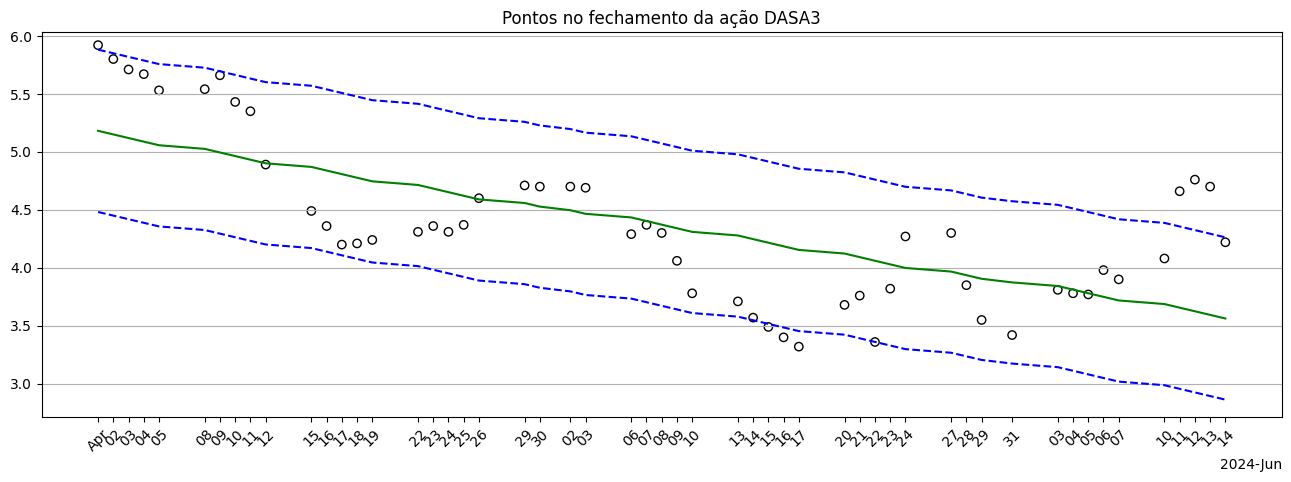

In [142]:
melhor_acao = bd_lista_acoes_analise.reset_index().sort_values("Alfa/Preço HLC (" + str(qtd_dias_minimo) +" períodos)", ascending = False).iloc[0]
display(melhor_acao)
# melhor_acao["Ticker"]

criar_regressao_bd_acao(
  yf.Ticker(melhor_acao["Ticker"] + ".SA").history(
    start = datetime.today() - BDay(55),
    end = datetime.today(),
    interval = "1d"
  ),
  coluna = "Close",
  print_variaveis = True,
  plot_grafico = True,
  tamanho_figsize = (16,5),
  rotacao = 45,
  titulo = "Pontos no fechamento da ação " + melhor_acao["Ticker"],
  var_pular_final_de_semana_feriados = False,
);

## Plota as 5 melhores ações do período (comentado)

In [75]:
# qtd_dias = 60

# display(bd_lista_acoes_analise.sort_values("Taxa média de Remuneração (pp/R$)", ascending = False).head(5))

# for acao in bd_lista_acoes_analise.sort_values("Taxa média de Remuneração (pp/R$)", ascending = False).head(5).index:
#   # print(acao)

#   bd_acao = yf.Ticker(acao + ".SA").history(
#       start = datetime.today() - timedelta(days=qtd_dias),
#       end = datetime.today(),
#       interval = "1d"
#   )
#   bd_acao.index = bd_acao.index.tz_localize(None)

#   [bd_acao_regressao, media, margem, modelo_linear, valor_fechamento] = criar_regressao_bd_acao(
#     bd_acao,
#     coluna = "Close",
#     print_variaveis = True,
#     plot_grafico = True,
#     titulo = acao + " (fechamento dos últimos " + str(qtd_dias) + " períodos)",
#     tamanho_figsize = (15, 6),
#     # rotacao = 60,
#   )

# Dashes interativos

https://colab.research.google.com/drive/1_PsF37NIy30E-Rwa0hJ4QM_Rk8XAFas9#scrollTo=wudZHwxd8sR5

# TO-DO

- [] Ele falou que um bom momento é quando o preço está voltando para a média móvel, pois é sinal que voltará a subir
    - Exemplo é CEMIG (CMIG4)
- [] Revisar se meu cálculo de martelo está ok ou não.
- [] Empilhar os dados da base com os alfas, para que vá criando um histórico (precisa alterar a linha certa, na data certa, e de preferência eu rodo esse script diariamente)

## Concluídos

- Pré 15/06/2024
  - [X] Adicionar uma visão só com o fechamento
  - [X] Comparar a inclinação da curva (alfa) de várias ações. Os que tem maiores alfas crescem mais
  - [X] Entender como o valor se comporta nos finais de semana e feriados (saltos) -> _coloquei uma opção na função de plot para ignorar finais de semana e feriados_
  - [X] Entender pq visualmente parece que a faixa de desvio padrão fica variando ao longo do período -> _não era só visual, a faixa estava mudando pq eu multiplicada a regressão pelo % de desvio/média. Mas é só eu somar o desvio padrão à regressão que ele fica estável ao longo da curca de regressão. Já ajustado na função que plota_
  - [] ~~Quando troca a taxa de remuneração para (alfa/último preço), fica muito estranho, pois ações de baixo preço ficarão com uma taxa altíssima. É isso mesmo?~~
- 15/06/2024
 - [X] Ajustar alfas para 13 e 55 dias
 - [X] Adicionar coluna de %13d e %55d, que é o Preço/Alfa
 - [X] Ordenar por essa coluna de %média